# Importando e tratando os dados

In [1]:
!pip install numpy pandas seaborn matplotlib statsmodels

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy import stats

In [3]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('dados_ibovespa.csv', sep=',', thousands='.', parse_dates=[0], date_format='%d.%m.%Y')
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-07-22,127860,127616,128151,127456,"6,10B","0,19%"
1,2024-07-19,127616,127652,128360,127413,"7,62B","-0,03%"
2,2024-07-18,127652,129450,129454,127523,"7,59B","-1,39%"
3,2024-07-17,129450,129112,129658,128741,"6,67B","0,26%"
4,2024-07-16,129110,129322,129521,128761,"6,82B","-0,16%"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      4953 non-null   datetime64[ns]
 1   Último    4953 non-null   int64         
 2   Abertura  4953 non-null   int64         
 3   Máxima    4953 non-null   int64         
 4   Mínima    4953 non-null   int64         
 5   Vol.      4952 non-null   object        
 6   Var%      4953 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 271.0+ KB


In [5]:
# Lista de nomes das colunas desejados
nomes_colunas = ['data', 'fechamento','abertura', 'maxima', 'minima', 'volume', 'variacao']

# Renomeando as colunas
df.columns = nomes_colunas
df.head()

,data,fechamento,abertura,maxima,minima,volume,variacao
0,2024-07-22,127860,127616,128151,127456,"6,10B","0,19%"
1,2024-07-19,127616,127652,128360,127413,"7,62B","-0,03%"
2,2024-07-18,127652,129450,129454,127523,"7,59B","-1,39%"
3,2024-07-17,129450,129112,129658,128741,"6,67B","0,26%"
4,2024-07-16,129110,129322,129521,128761,"6,82B","-0,16%"


In [6]:
# Tratando volume - removendo letras e substituir vírgula por ponto
df['volume'] = df['volume'].str.replace('B', 'e9').str.replace('M', 'e6').str.replace('K','e3').str.replace(',', '.')

# Convertendo para numérico
df['volume'] = pd.to_numeric(df['volume'])

df.head()

,data,fechamento,abertura,maxima,minima,volume,variacao
0,2024-07-22,127860,127616,128151,127456,6.100000e+09,"0,19%"
1,2024-07-19,127616,127652,128360,127413,7.620000e+09,"-0,03%"
2,2024-07-18,127652,129450,129454,127523,7.590000e+09,"-1,39%"
3,2024-07-17,129450,129112,129658,128741,6.670000e+09,"0,26%"
4,2024-07-16,129110,129322,129521,128761,6.820000e+09,"-0,16%"


In [7]:
# Tratando variação - Removendo o símbolo de porcentagem e converter para float
df['variacao'] = df['variacao'].str.replace('%', '').str.replace(',', '.').astype(float)

df.head()

,data,fechamento,abertura,maxima,minima,volume,variacao
0,2024-07-22,127860,127616,128151,127456,6.100000e+09,0.19
1,2024-07-19,127616,127652,128360,127413,7.620000e+09,-0.03
2,2024-07-18,127652,129450,129454,127523,7.590000e+09,-1.39
3,2024-07-17,129450,129112,129658,128741,6.670000e+09,0.26
4,2024-07-16,129110,129322,129521,128761,6.820000e+09,-0.16


In [8]:
# Ordenando os dados pela data em ordem crescrente
df = df.sort_values('data').reset_index(drop=True)
df.head()

,data,fechamento,abertura,maxima,minima,volume,variacao
0,2004-07-22,21730,21821,21938,21490,247830000.0,-0.37
1,2004-07-23,21591,21729,22100,21559,318000000.0,-0.64
2,2004-07-26,21318,21635,21930,21056,227130000.0,-1.26
3,2004-07-27,21737,21325,21813,21236,282560000.0,1.97
4,2004-07-28,22168,21740,22213,21613,285650000.0,1.98


In [9]:
df.tail()

,data,fechamento,abertura,maxima,minima,volume,variacao
4948,2024-07-16,129110,129322,129521,128761,6.820000e+09,-0.16
4949,2024-07-17,129450,129112,129658,128741,6.670000e+09,0.26
4950,2024-07-18,127652,129450,129454,127523,7.590000e+09,-1.39
4951,2024-07-19,127616,127652,128360,127413,7.620000e+09,-0.03
4952,2024-07-22,127860,127616,128151,127456,6.100000e+09,0.19


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        4953 non-null   datetime64[ns]
 1   fechamento  4953 non-null   int64         
 2   abertura    4953 non-null   int64         
 3   maxima      4953 non-null   int64         
 4   minima      4953 non-null   int64         
 5   volume      4952 non-null   float64       
 6   variacao    4953 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 271.0 KB


In [11]:
# convertendo data em índice
df = df.set_index('data')

df.head()

,fechamento,abertura,maxima,minima,volume,variacao
data,,,,,,
2004-07-22,21730,21821,21938,21490,247830000.0,-0.37
2004-07-23,21591,21729,22100,21559,318000000.0,-0.64
2004-07-26,21318,21635,21930,21056,227130000.0,-1.26
2004-07-27,21737,21325,21813,21236,282560000.0,1.97
2004-07-28,22168,21740,22213,21613,285650000.0,1.98


# Análise Exploratória dos Dados

## Passo 1: Visualização dos dados

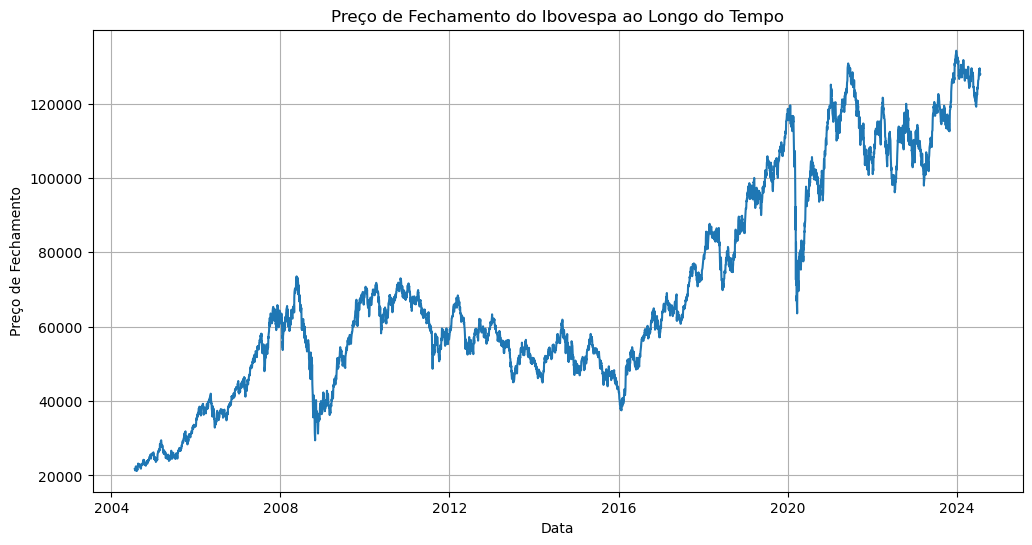

In [12]:
# Gráfico de linha do preço de fechamento ao longo do tempo

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['fechamento'], linestyle='-')
plt.title('Preço de Fechamento do Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()

### Visualização das estatísticas rolantes

In [13]:
# Estatísticas rolantes
rolmean = df['fechamento'].rolling(window=12).mean()
rolstd = df['fechamento'].rolling(window=12).std()

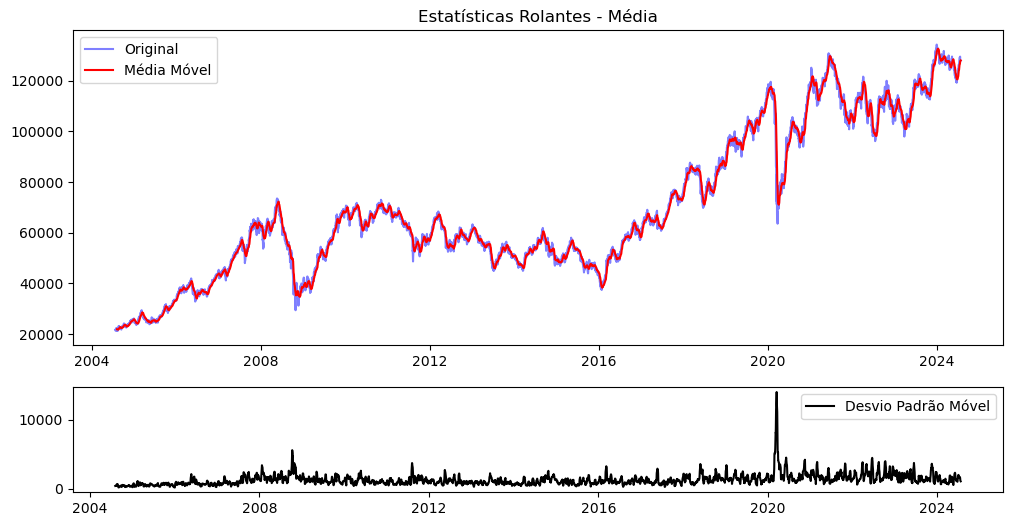

In [14]:
# Plot das estatísticas rolantes
fig = plt.figure(figsize=(12, 6))

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0])
ax1.plot(df['fechamento'], color='blue', label='Original', alpha=0.5)
ax1.plot(rolmean, color='red', label='Média Móvel')
ax1.legend(loc='best')
ax1.set_title('Estatísticas Rolantes - Média')

ax2 = fig.add_subplot(gs[1])
ax2.plot(rolstd, color='black', label='Desvio Padrão Móvel')
ax2.legend(loc='best')

plt.show()

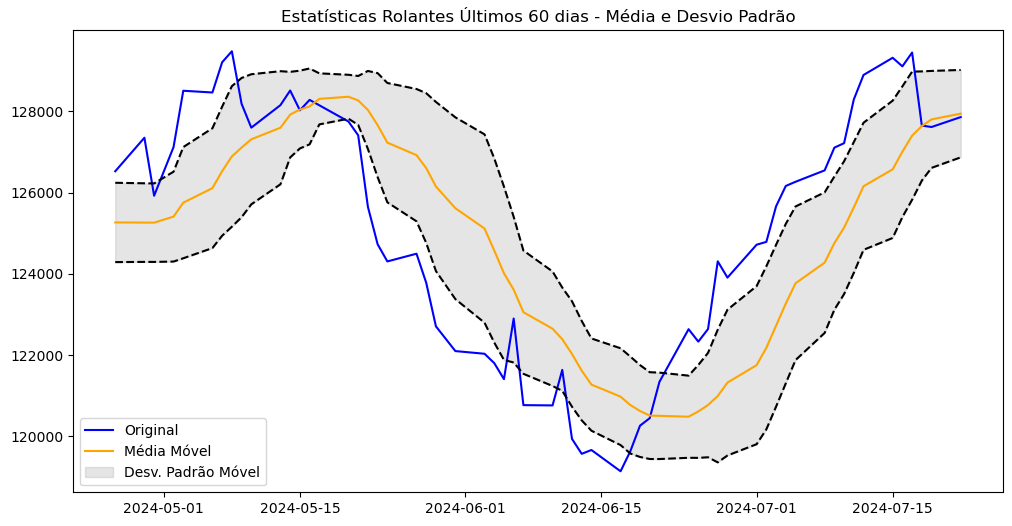

In [15]:
# Estatísticas Rolantes Últimos 60 dias

df_recent = df['fechamento'][-60:]
rolmean_recent = rolmean[-60:]
rolstd_recent = rolstd[-60:]

# Plot das estatísticas rolantes últimos 60 dias
plt.figure(figsize=(12, 6))
plt.plot(df_recent, color='blue', label='Original')
plt.plot(rolmean_recent, color='orange', label='Média Móvel')
plt.plot(rolmean_recent + rolstd_recent, linestyle='--', color='black')
plt.plot(rolmean_recent - rolstd_recent, linestyle='--', color='black')
plt.fill_between(df_recent.index, (rolmean_recent - rolstd_recent), (rolmean_recent + rolstd_recent), color='gray', alpha=0.2, label='Desv. Padrão Móvel')

plt.legend(loc='best')
plt.title('Estatísticas Rolantes Últimos 60 dias - Média e Desvio Padrão')
plt.show()

### Decomposição da Série Temporal

In [20]:
resultados = seasonal_decompose(df['fechamento'], model='additive', period=30)  # Exemplo de período sazonal de 30 dias

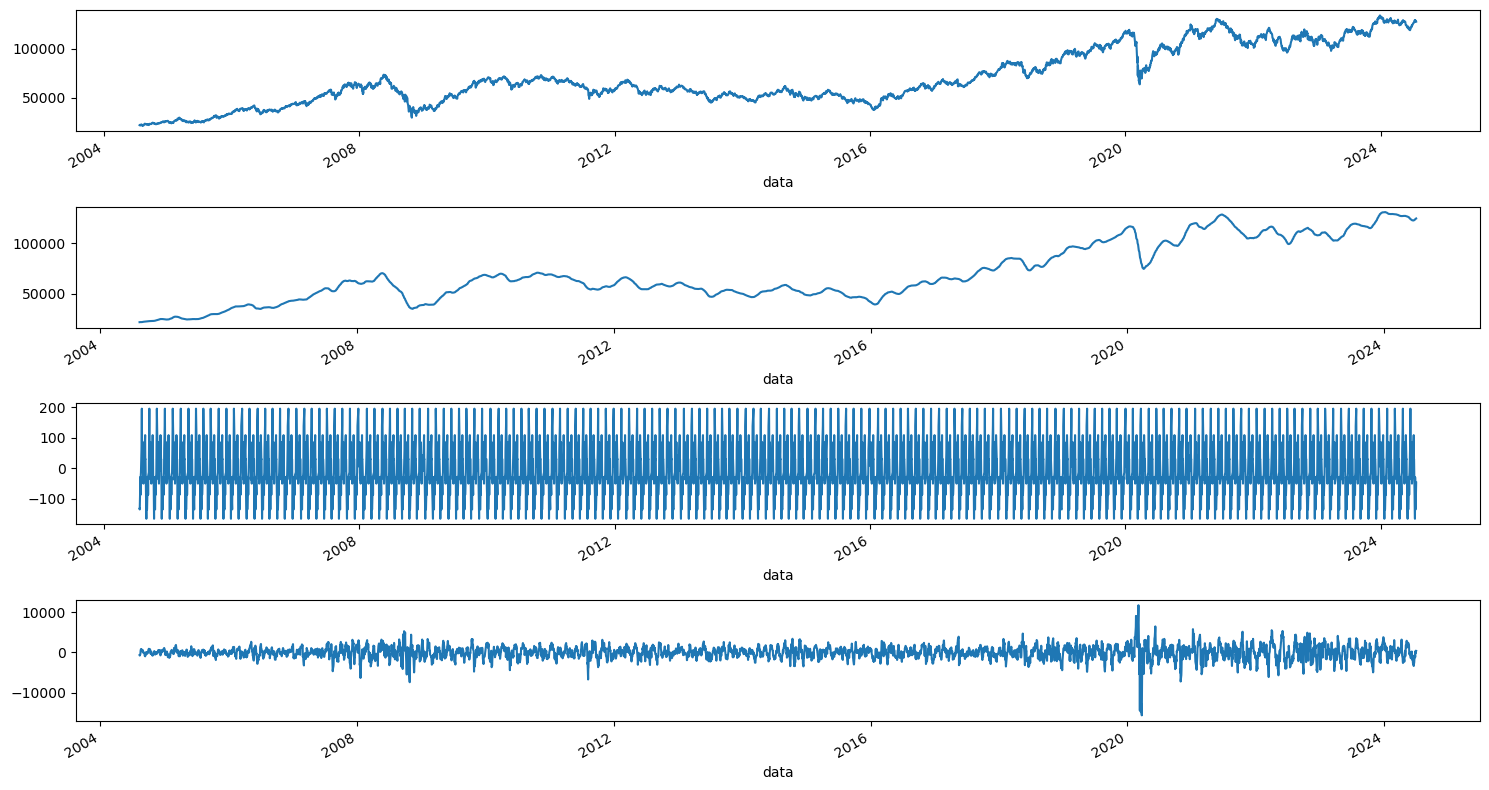

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))

resultados.observed.plot(ax = ax1)

#tendencia
resultados.trend.plot(ax = ax2)

#sazonalidade
resultados.seasonal.plot(ax = ax3)

#residuo dos dados
resultados.resid.plot(ax = ax4)

plt.tight_layout()

## Passo 2: Testes de estacionariedade e sazonalidade

### Teste de Estacionariedade

In [24]:
# Teste de Dickey-Fuller
print('Resultados do Teste de Dickey-Fuller:')
dftest = adfuller(df['fechamento'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Estatística do Teste', 'Valor-p', 'Número de Lags Usados', 'Número de Observações Usadas'])
for key, value in dftest[4].items():
    dfoutput['Valor Crítico (%s)' % key] = value
print(dfoutput)

# Verificar o valor-p e imprimir o resultado do teste de estacionariedade
if dftest[1] > 0.05:
    print("Provavelmente não é um grafico estacionariedade.")
else:
    print("Provavelmente é um grafico estacionariedade.")

Resultados do Teste de Dickey-Fuller:
Estatística do Teste              -1.222467
Valor-p                            0.663857
Número de Lags Usados             11.000000
Número de Observações Usadas    4941.000000
Valor Crítico (1%)                -3.431674
Valor Crítico (5%)                -2.862125
Valor Crítico (10%)               -2.567081
dtype: float64
Provavelmente não é um grafico estacionariedade.


### Teste de Sazonalidade

In [28]:
#TESTE DE SAZONALIDADE

# Separar os dados por períodos sazonais
groups = [group[1]['fechamento'].values for group in df.groupby(df.index.month)]

# Aplicar o teste de Fisher
statistic, p= stats.f_oneway(*groups)

# Imprimir o valor-p
print(f'Valor-p do teste de Fisher: {p:.4f}')

if p > 0.05:
  print("Não há evidencia suficiente para rejeitar a hipotese de sazonalidade")
else:
  print("A hipotese de sazonalidade é rejeitada")

Valor-p do teste de Fisher: 0.1588
Não há evidencia suficiente para rejeitar a hipotese de sazonalidade


### Análise dos Resultados

- Estatística do Teste (ADF): -1.222467

A estatística do teste de Dickey-Fuller é significativamente maior que os valores críticos em todos os níveis de significância (1%, 5%, 10%). Isso indica que não temos evidências estatísticas suficientes para rejeitar a hipótese nula de que a série possui uma raiz unitária, ou seja, podemos considerar a série como não estacionária, ou seja, apresenta tendências claras, sazonalidades ou variações que dependam do tempo.

- Valor-p: 0.68

O valor-p é não é pequeno (0.68), ou seja, 68% significativamente maior que qualquer nível de significância comum, algo em torno de 5% (0.05). Isso reforça ainda mais a conclusão de que a série não é estacionária.

#### Conclusão

Com base nos resultados do teste, podemos concluir que a série temporal do preço de fechamento do Ibovespa não é estacionária. A estatística do teste de ADF é maior que os valores críticos correspondentes e o valor-p alto, comparado com o nivel de signficancia comum (5%), indicando que há raiz unitária na série e que ela não é estacionária.

Portanto, podemos **proceder com confiança para modelagem e previsão usando métodos adequados para séries temporais como ARIMA** por exemplo.